# Netflix case study Scaler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Importing the netflix dataset

In [2]:
df = pd.read_csv('Netflix.csv')

In [3]:
df.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


### We can use the info() method to get a summary of the type of data and how many data points are missing in the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### From the above information we can understand that we have a total of 8807 rows and columns such as director, cast, country, date_added, rating and duration have missing entries. Let's look at how many data points specifically are missing

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Before treating the missing values let's explore the data a bit more

### Let's see if we have any duplicate rows 

In [6]:
df.duplicated().sum()

0

### Since we now only have one column release_year of the data type of integer we can use the describe method to understand the various attributes of this column 

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### From the above data we can see that the mean is 2014 which indicates that most of the movies/series in the data set are from the year of 2014. The oldest item in the dataset is as old as 1925 and the oldest data entry is that of 2021

### Now let's see among the various columns how many uniques values are present in each column:

In [8]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## Dealing with the missing values

In [9]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [10]:
df['director'].replace(np.nan, 'No Data', inplace=True)
df['cast'].replace(np.nan, 'No Data', inplace=True)

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### For the country column we can replace the NaN values with the mode of the values

In [12]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

#### Duration only has about 4 missing values we can replace the NaN values with a string indicating that the data isn't available

In [13]:
df['duration'].replace(np.nan, 'No Data', inplace=True)

In [14]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         0
listed_in        0
description      0
dtype: int64

#### We can see that only release_year and date_added have some missing values. We can replace the NaN values in rating with a string "No Data" and date_added column with the mode value

In [15]:
df['rating'].replace(np.nan,'No Data', inplace=True)
df['date_added'].replace(np.nan,df['date_added'].mode()[0], inplace=True)

In [16]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### From the about cell we can see that all the NaN values have been treated

### Now lets fix the nested values in the cast, listed_in, director and country column

In [18]:
df_cast = df['cast'].str.split(',', expand=True).stack()
df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']

In [19]:
df_cast.head(10)

,cast,show_id
0,No Data,s1
1,Ama Qamata,s2
1,Khosi Ngema,s2
1,Gail Mabalane,s2
1,Thabang Molaba,s2
1,Dillon Windvogel,s2
1,Natasha Thahane,s2
1,Arno Greeff,s2
1,Xolile Tshabalala,s2
1,Getmore Sithole,s2


In [20]:
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']

In [21]:
df_listed_in.head(10)

,listed_in,show_id
0,Documentaries,s1
1,International TV Shows,s2
1,TV Dramas,s2
1,TV Mysteries,s2
2,Crime TV Shows,s3
2,International TV Shows,s3
2,TV Action & Adventure,s3
3,Docuseries,s4
3,Reality TV,s4
4,International TV Shows,s5


In [22]:
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

In [23]:
df_director.head(10)

,director,show_id
0,Kirsten Johnson,s1
1,No Data,s2
2,Julien Leclercq,s3
3,No Data,s4
4,No Data,s5
5,Mike Flanagan,s6
6,Robert Cullen,s7
6,JosÃ© Luis Ucha,s7
7,Haile Gerima,s8
8,Andy Devonshire,s9


In [24]:
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']

In [25]:
df_country.head(10)

,country,show_id
0,United States,s1
1,South Africa,s2
2,United States,s3
3,United States,s4
4,India,s5
5,United States,s6
6,United States,s7
7,United States,s8
7,Ghana,s8
7,Burkina Faso,s8


### Let's now bring it back to the original data frame

In [26]:
columns_to_drop = ['cast', 'director', 'country','listed_in']

In [27]:
df = df.drop(columns=columns_to_drop)

In [28]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...


In [29]:
df = df.merge(df_cast, on='show_id', how='left')
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Data
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [30]:
df = df.merge(df_director, on='show_id', how='left')
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Data,Kirsten Johnson
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,No Data
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,No Data
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,No Data
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Thabang Molaba,No Data


In [31]:
df = df.merge(df_listed_in, on='show_id', how='left')
df = df.merge(df_country, on='show_id', how='left')
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,listed_in,country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Data,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,No Data,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,No Data,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,No Data,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,No Data,International TV Shows,South Africa


#### We can convert the date_added column to be a date column

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   date_added    202065 non-null  object
 4   release_year  202065 non-null  int64 
 5   rating        202065 non-null  object
 6   duration      202065 non-null  object
 7   description   202065 non-null  object
 8   cast          202065 non-null  object
 9   director      202065 non-null  object
 10  listed_in     202065 non-null  object
 11  country       202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [33]:
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   date_added    200477 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        202065 non-null  object        
 6   duration      202065 non-null  object        
 7   description   202065 non-null  object        
 8   cast          202065 non-null  object        
 9   director      202065 non-null  object        
 10  listed_in     202065 non-null  object        
 11  country       202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


### Data Visualization

### lets Look at how many movies and TV shows we have:

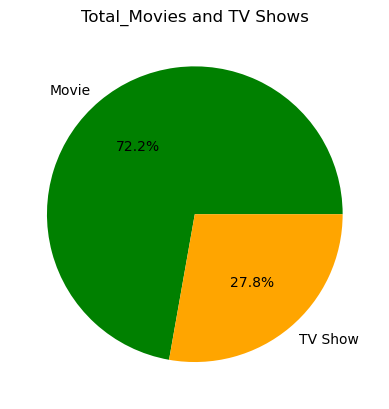

In [35]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['green' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

#### Let's look at the number of movies released on a year to year basis

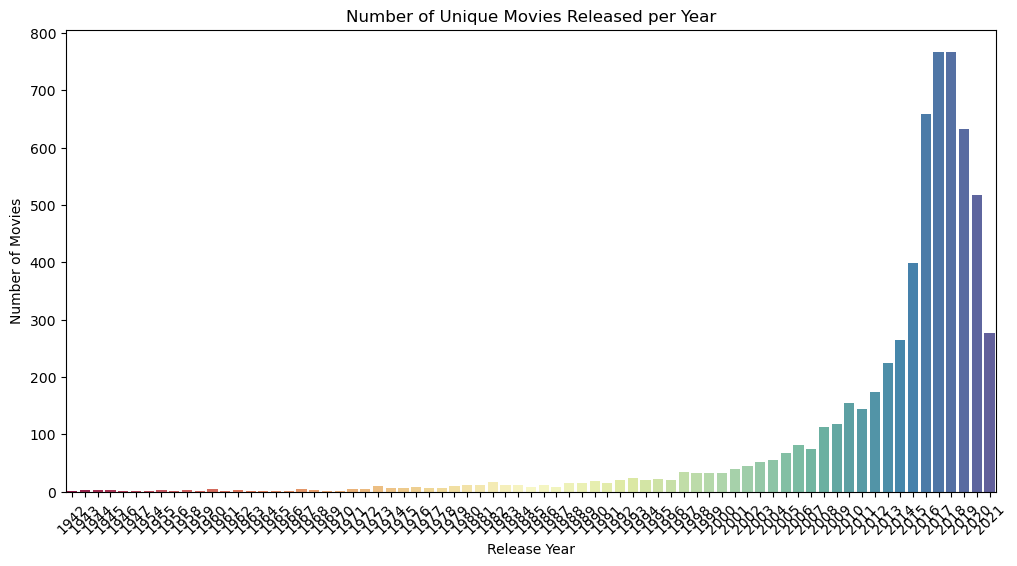

In [36]:
movies_df = df[df['type'] == 'Movie']
movies_per_year = movies_df.groupby('release_year')['title'].nunique().reset_index(name='count')
plt.figure(figsize=(12, 6))


sns.barplot(x='release_year', y='count', data=movies_per_year, palette='Spectral')


plt.title('Number of Unique Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)


plt.show()

#### Let's Now look at the number of TV Shows Released on a year to year basis

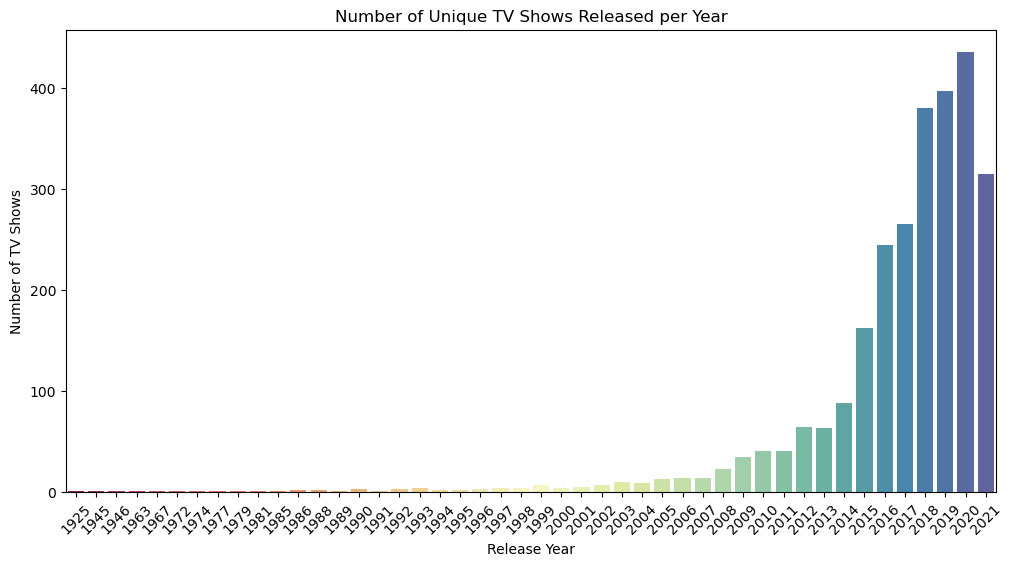

In [37]:
tv_shows_df = df[df['type'] == 'TV Show']

tv_shows_per_year = tv_shows_df.groupby('release_year')['title'].nunique().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='count', data=tv_shows_per_year, palette='Spectral')
plt.title('Number of Unique TV Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)

plt.show()

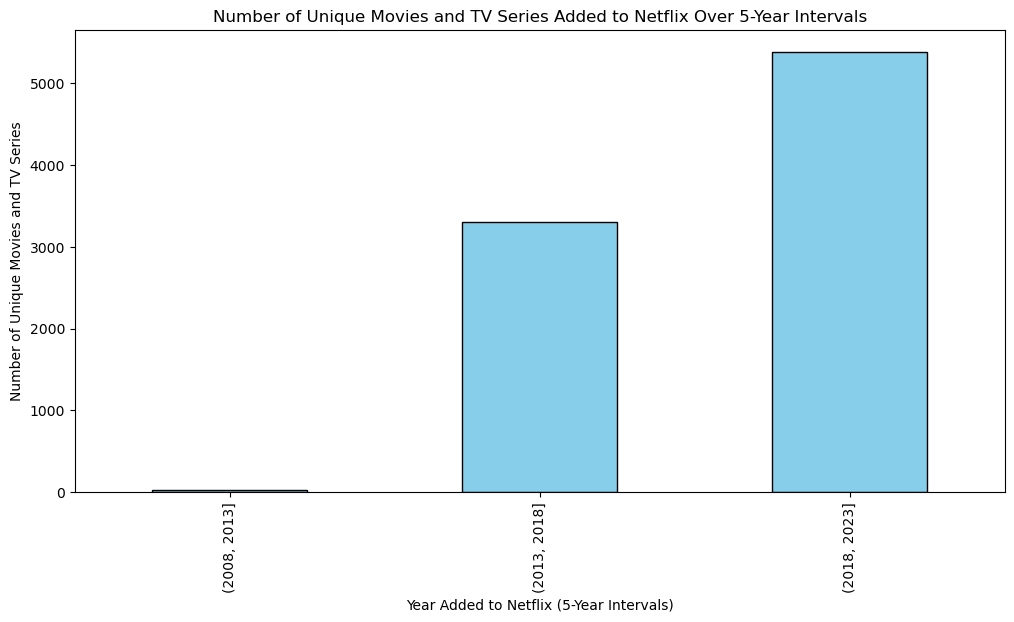

In [38]:
df['added_year'] = df['date_added'].dt.year.astype('Int64') 

df = df.dropna(subset=['added_year'])

unique_titles_counts = df.groupby(pd.cut(df['added_year'], bins=range(min(df['added_year']), max(df['added_year']) + 6, 5)))['title'].nunique()

plt.figure(figsize=(12, 6))
bar_plot = unique_titles_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Unique Movies and TV Series Added to Netflix Over 5-Year Intervals')
plt.xlabel('Year Added to Netflix (5-Year Intervals)')
plt.ylabel('Number of Unique Movies and TV Series')

plt.show()

#### In the above visualizations, it is evident that the majority of movies and TV series were added between 2013 and 2021, a trend that aligns with the widespread availability and easy accessibility of the internet during this period. Additionally, people developed a preference for online streaming sites over traditional options. Netflix, in response to the rising demand and revenue, began producing its own shows and movies. This shift in the industry is reflected in the increasing number of movie and TV series releases after 2014, as more production houses recognized the benefits of OTT and started releasing their works on these platforms.

### Let's now look at how the length of a movie fared through the years

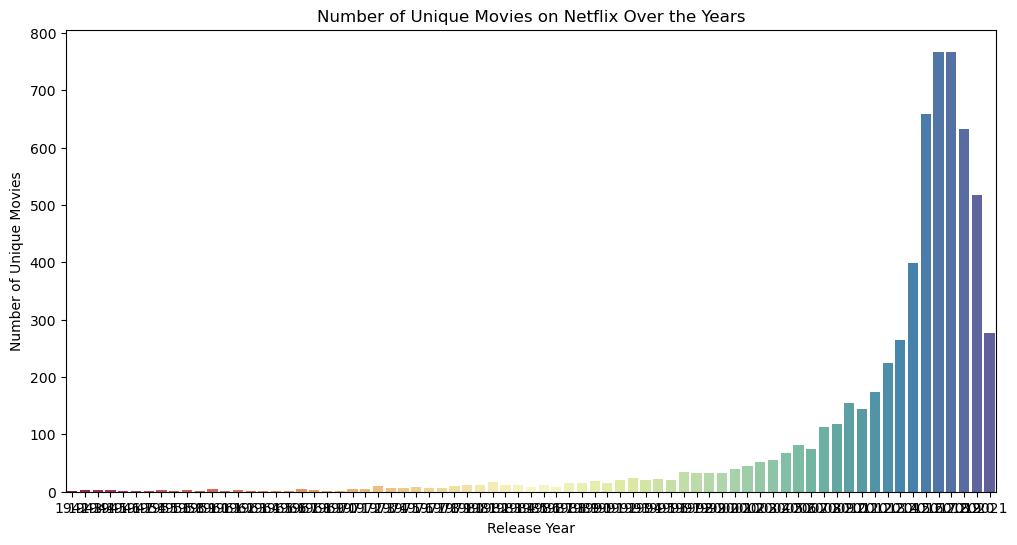

In [39]:
df['duration'] = df['duration'].astype(str)
df['duration'] = pd.to_numeric(df['duration'].str.extract('(\d+)', expand=False), errors='coerce')

movies_df = df[df['type'] == 'Movie']

unique_movies_counts = movies_df.groupby('release_year')['title'].nunique()

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=unique_movies_counts.index, y=unique_movies_counts.values, palette='Spectral', errorbar=None)

plt.title('Number of Unique Movies on Netflix Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Movies')

plt.show()

#### Although the X axis isn't clear we can still understand that the average duration of a movie remains has been around the 100 minute range 

### Let's now look at the distribution of the ratings

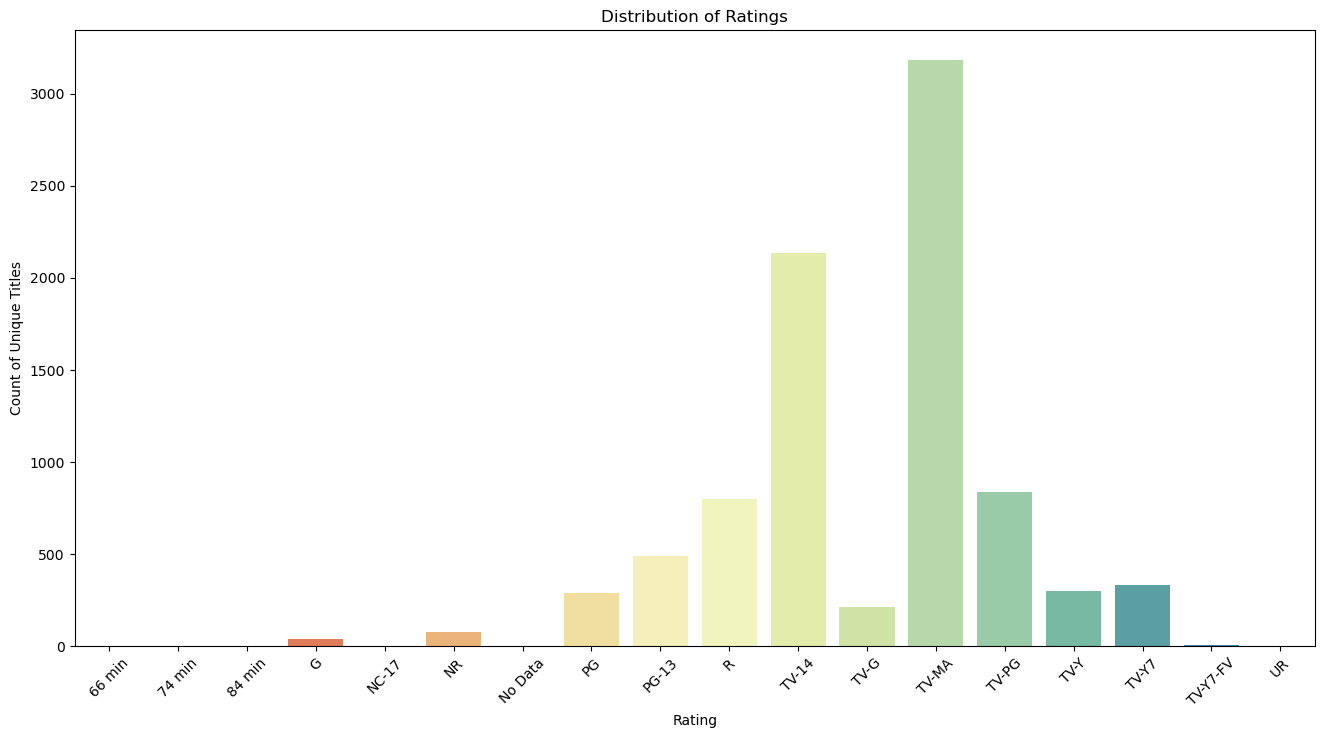

In [40]:
rating_counts = df.groupby('rating')['title'].nunique()
plt.figure(figsize=(16, 8))
colors = ['#b20710'] + ['#221f1f'] * (len(rating_counts) - 1)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Spectral')
plt.xlabel('Rating')
plt.ylabel('Count of Unique Titles')
plt.title('Distribution of Ratings')

plt.xticks(rotation=45)

plt.show()

### Let's Now take a look at the top 10 Genres and the bottom 10 Genres

#### Top 10:

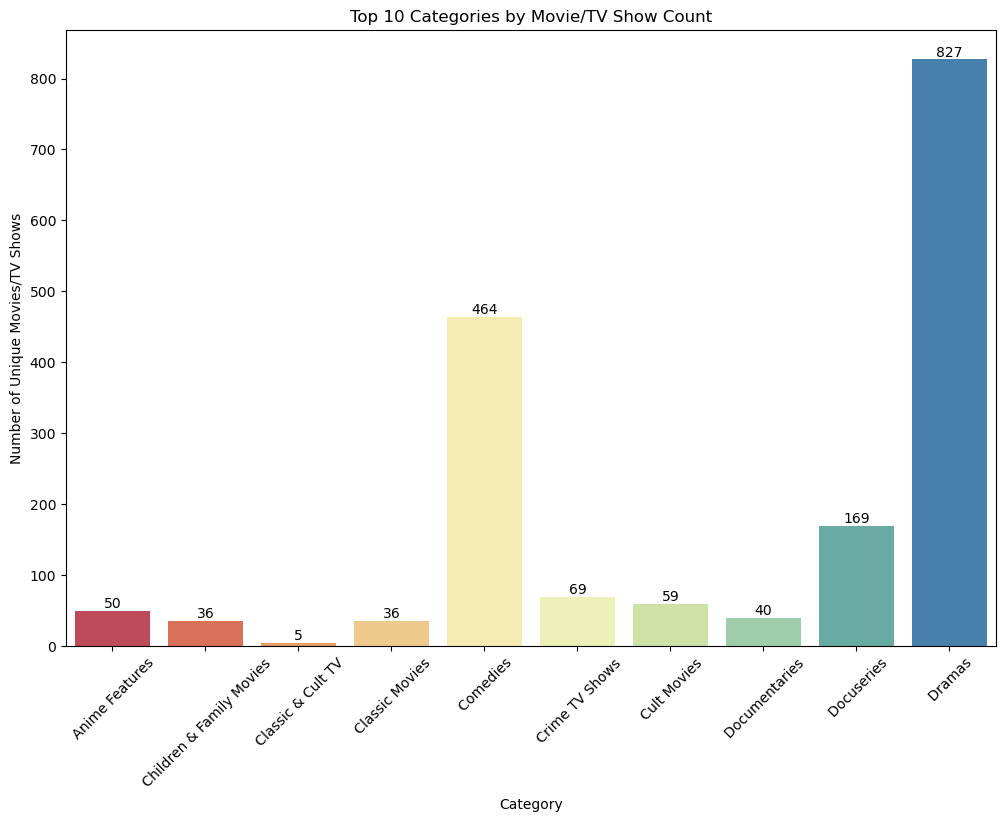

In [41]:
listed_in_counts = df.groupby('listed_in')['title'].nunique()

top_10_listed_in = listed_in_counts.head(10)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_10_listed_in.index, y=top_10_listed_in.values, palette='Spectral')

plt.xlabel('Category')
plt.ylabel('Number of Unique Movies/TV Shows')
plt.title('Top 10 Categories by Movie/TV Show Count')
plt.xticks(rotation=45)

for index, value in enumerate(top_10_listed_in.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

#### Bottom 10:

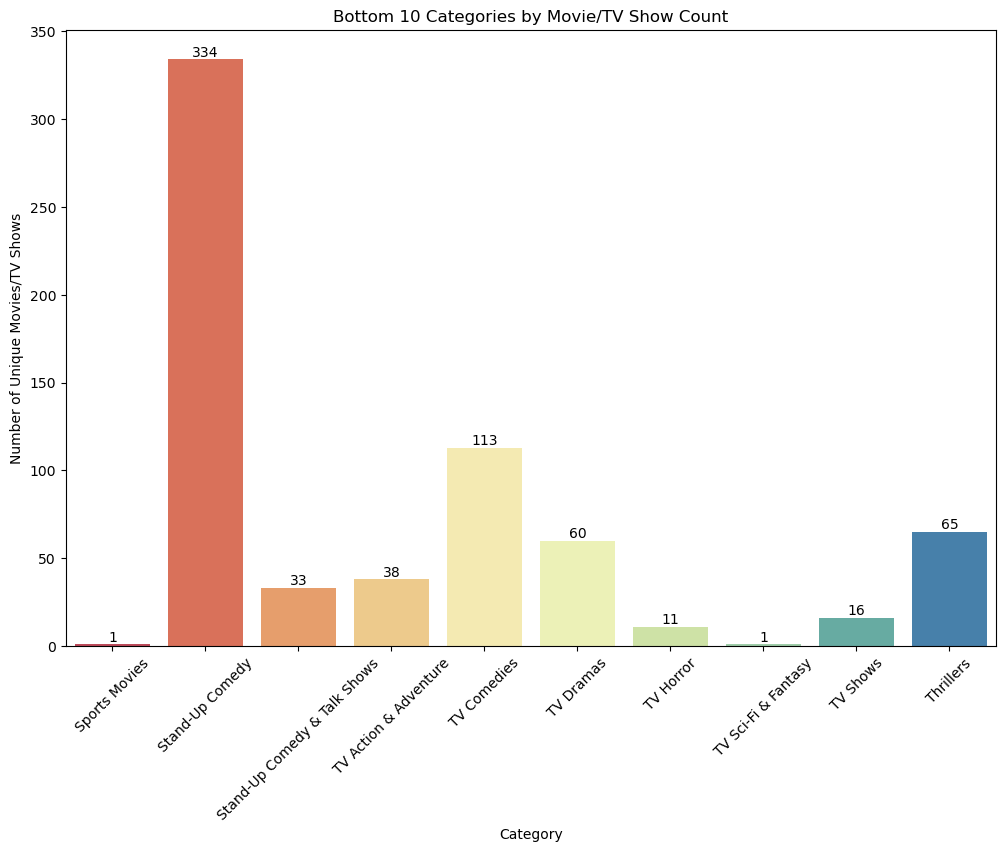

In [42]:
listed_in_counts = df.groupby('listed_in')['title'].nunique()

bottom_10_listed_in = listed_in_counts.tail(10)
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=bottom_10_listed_in.index, y=bottom_10_listed_in.values, palette='Spectral')
plt.xlabel('Category')
plt.ylabel('Number of Unique Movies/TV Shows')
plt.title('Bottom 10 Categories by Movie/TV Show Count')
plt.xticks(rotation=45)

for index, value in enumerate(bottom_10_listed_in.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### Lets look at the Total movies/TV shows distribution by duration of the content


In [43]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show'] 


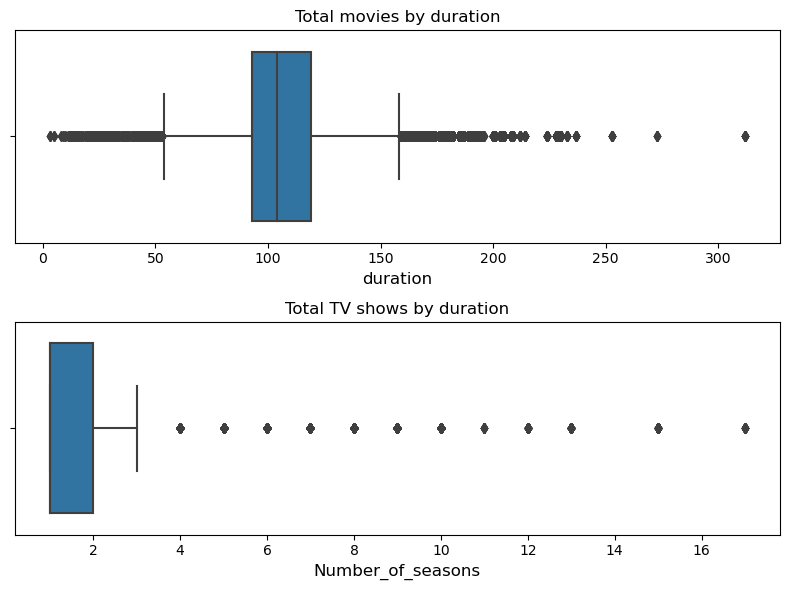

In [44]:

fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration' ,ax =ax[0])
ax[0].set_xlabel('duration' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_shows , x = 'duration' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()